In [67]:
# !pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [68]:
# code adapted from https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
# processImage(Image) -> Image
# set the image as a grayscale image.
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code= cv2.COLOR_BGR2GRAY)
    return image


In [80]:
def convolve(image, kernel, padtype = 'edge'):
    # kernel needs to be flipped horizontally and vertically before applying convolution kernel; else it becomes cross-correlation.
    kernel = np.flipud(np.fliplr(kernel))
    # x,y side kernel length will be used to determine the length of the image patch to convolve with the kernel.
    # e.g. a for a 3x2 kernel, we will apply a 3x2 patch of the padded image to the kernel.
    xklen = kernel.shape[0]
    yklen = kernel.shape[1]
    # image lengths will be used to create an empty canvas with the dimensions increased by the padding.
    ximlen = image.shape[0]
    yimlen=image.shape[1]
    
    # padding lengths are 1 less than the kernel size so that the entire canvas applies convolution within the image bounds.
    xpadding = xklen - 1
    ypadding = yklen - 1

    # begin to create the padded image: zero canvas the size of the image + padding sizes. 
    # Then copy the image onto the padded image.
    # padded_image = np.zeros((int(ximlen) + xpadding * 2,int(yimlen) +ypadding*2))
    padded_image = image
    # padded_image[xpadding:xpadding+ximlen,ypadding:ypadding+yimlen] = image
    # padded_image[0:xpadding,0]
    padded_image = np.pad(padded_image,((xpadding,xpadding),(ypadding,ypadding)), padtype)

    # initialize final output image.
    final_image = np.zeros_like(padded_image)
    # iterate through the padded_image
    for i in range(0, padded_image.shape[0]):
        for j in range(0, padded_image.shape[1]):
            # apply the image patch with the kernel by matrix multiplication and the resulting total sum.
            try:
                # final_image[i-xpadding,j-ypadding] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
                final_image[i,j] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
            # when dimensions not equal, then the loop stops.
            except:
                break    
    # trim  out the padding
    final_image = final_image[xpadding:xpadding+ximlen,ypadding:ypadding+yimlen]
    # return final_image
    return final_image
    # for i in range(xpadding, padded_image.shape[0]+xpadding):
    #     for j in range(ypadding,padded_image.shape[1]+ypadding):


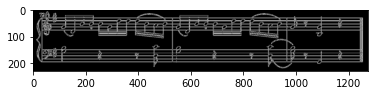

In [81]:
image2 = processImage('./templates/template2.png')
image2 = processImage('./images/music1.png')
# numpy_array = np.array([[1,2],[3,4],[5,6]])
# a = np.pad(numpy_array, ((1,1),(1,1)), 'constant')
a
# convolve_padding(image2,kernel)
image2 = convolve(image2,kernel)
# numpy_array = convolve_padding(numpy_array,kernel)
# numpy_array
plt.imshow(image2)
# np.pad(numpy_array,((1,1),(1,1)), 'edge')

In [82]:
# def convolve(image,kernel,padding =0):
# def convolve(image, kernel):
#     # kernel needs to be flipped horizontally and vertically before applying convolution kernel; else it becomes cross-correlation.
#     kernel = np.flipud(np.fliplr(kernel))
#     # x,y side kernel length will be used to determine the length of the image patch to convolve with the kernel.
#     # e.g. a for a 3x2 kernel, we will apply a 3x2 patch of the padded image to the kernel.
#     xklen = kernel.shape[0]
#     yklen = kernel.shape[1]
#     # image lengths will be used to create an empty canvas with the dimensions increased by the padding.
#     ximlen = image.shape[0]
#     yimlen=image.shape[1]
    
    # padding lengths are 1 less than the kernel size so that the entire canvas applies convolution within the image bounds.
    # xpadding = xklen - 1
    # ypadding = yklen - 1

    # # begin to create the padded image: zero canvas the size of the image + padding sizes. 
    # # Then copy the image onto the padded image.
    # padded_image = np.zeros((int(ximlen) + xpadding * 2,int(yimlen) +ypadding*2))
    # padded_image[xpadding:xpadding+ximlen,ypadding:ypadding+yimlen] = image

    # # initialize final output image.
    # final_image = np.zeros_like(padded_image)
    # # iterate through the padded_image
    # for i in range(0, padded_image.shape[0]):
    #     for j in range(0, padded_image.shape[1]):
    #         # apply the image patch with the kernel by matrix multiplication and the resulting total sum.
    #         try:
    #             # final_image[i-xpadding,j-ypadding] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
    #             final_image[i,j] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
    #         # when dimensions not equal, then the loop stops.
    #         except:
    #             break    
    # # trim  out the padding
    # final_image = final_image[xpadding:xpadding+ximlen,ypadding:ypadding+yimlen]
    # # return final_image
    # return final_image
    # '''
    # Given grayscale image, convolve with a kernel

    # Params:
    #     im (PIL.Image): grayscale image
    #     k (2d np.array): convolution kernel

    # Returns:
    #     imOut (PIL.Image): resulting image
    # '''
    # # pass



# TODO
def convolve_separable(im, kx, ky):    
    '''
    Given grayscale image, convolve with a separable kernel k = kx^T * ky

    Params:
        im (PIL.Image): grayscale image
        kx (np.array): kernel in x direction
        ky (Np.array): kernel in y direction
    
    Returns:
        imOut (PIL.Image): resulting image
    '''
    # pass

    # kx = np.transpose(kx)
    output = convolve(im,kx)
    output = convolve(output,ky)
    return output 



In [83]:
numpy_array = np.array([[1,2],[3,4]]) # 2D array
# array([[1, 2], # Before padding
#        [3, 4]])
np.pad(numpy_array, ((1,2),(2,1)), 'reflect')

array([[3, 4, 3, 4, 3],
       [1, 2, 1, 2, 1],
       [3, 4, 3, 4, 3],
       [1, 2, 1, 2, 1],
       [3, 4, 3, 4, 3]])

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

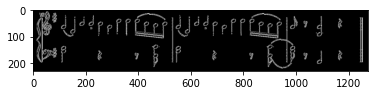

In [85]:
# image = processImage('sc.png')
image = processImage('Image.jpeg')
image = processImage('./images/music1.png')
# Edge Detection Kernel
kernel = np.array([
    [-1, -1, -1],
 [-1, 8, -1], 
 [-1, -1, -1]])
# output =convolve(image, kernel)
# plt.imshow(output)
k1 = np.transpose(np.array([
    [1,2,1]
]))
k2 = np.array([
    [1,0,-1]
])
output = convolve_separable(image,k1,k2)
# output = convolve(image,kernel)
plt.gray()
plt.imshow(output)
from PIL import Image
Image.fromarray(output).show()
(k1) * k2

In [111]:
a = np.array([
       [-1,  8],
       [-1, -1],
       [-1, -1]])
a = np.flipud((np.fliplr(a)))
a.shape[0]

3

1.0
[0.0625 0.25   0.375  0.25   0.0625]


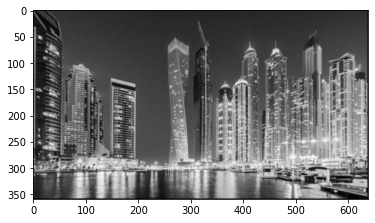

In [112]:
gaus1d = np.array([1,2,1])
gaus1d = gaus1d * (1/gaus1d.sum())
akernel = convolve1D(gaus1d,gaus1d,2)
# akernel = convolve1D(akernel,[1,1,1],2)
print(akernel.sum())
print(akernel)

# akernel = akernel * (1/akernel.sum())
akernel
akernel = np.transpose([akernel]) * akernel
# akernel = akernel * (1/akernel.sum())
akernel
# np.transpose(np.array([[1,1,1]]))
# np.array([1,1,1])
f = convolve_separable(image,np.transpose([gaus1d]),[gaus1d])
plt.imshow(f)

In [99]:
from PIL import Image, ImageFilter,ImageDraw
# from PIL import ImageFilter
aaa = Image.fromarray(image)
aaa.show()
bbb = Image.fromarray(f)
bbb.show()
# Image.open("Image.jpeg")

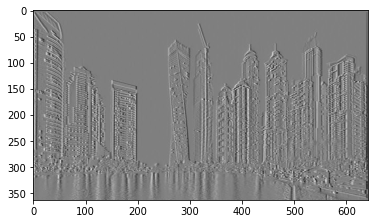

In [24]:
a1 = [1,5,9,3,5,2,8,3,4,5]
k = [1,1,1,1,1]
a1 = [1,0,2,1]
k = [2,0,1]
a1 = [1,1,1]
k = [1,1,1]
a1_padded = np.zeros(len(a1)+ len(k)*2)
len(a1_padded)
a1_padded[len(k):len(k)+len(a1)] = a1 
a1_padded
def convolve1D(signal, kernel, padding = 0):
    kernel = np.flipud(kernel)
    klen = len(kernel)
    if padding != 0:
        padded_image = np.zeros(len(signal) + padding * 2)
        padded_image[padding:padding+len(signal)] = signal
    # for i in 
    final_image = np.zeros(len(padded_image) - padding)
    # final_image = padded_image[padding:padding+len(signal)]
    for i in range(0, len(padded_image)):
        try:
            final_image[i] = (padded_image[i:i+klen] * kernel).sum()
        except:
            break
        # print(i)
    # return final_image,padded_image
    return final_image
def convolve2D(image,kernel,padding =0):
    kernel = np.flipud(np.fliplr(kernel))
    xklen = kernel.shape[0]
    yklen = kernel.shape[1]
    ximlen = image.shape[0]
    yimlen=image.shape[1]
    if padding != 0:
        padded_image = np.zeros((int(ximlen) + padding * 2,int(yimlen) +padding*2))
        padded_image[padding:padding+ximlen,padding:padding+yimlen] = image
    else:
        # else:
        padded_image = image
    final_image = np.zeros((padded_image.shape[0] - padding ,padded_image.shape[1] - padding))
    for i in range(0, padded_image.shape[0]):
        for j in range(0,padded_image.shape[1]):
            try:
                final_image[i,j] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
            except:
                break    
    return final_image
d = convolve2D(image, np.transpose(k1), 2)
d = convolve2D(d, k2,2)
# print(d,'\n',e)
klen = int(len(k))-1
c = convolve1D(a1,k,klen)
c = convolve1D(c,k,klen)
c = convolve1D(c,k,klen)
c
plt.imshow(d)
# kernel

In [155]:
a1[0:2]

[1, 5]

In [134]:
a1 = [1,5,9,3,5,2,8,3,4,5]
a1_padded = np.zeros(len(a1)+ len(k))
a1_padded[k+1]
k = [1,1,1,1,1]
len(a1)
r = 0
prev_sum = 0
# first_index = 0
for i in range(1, len(k)+1):
    # print(i)
    print(a1[0:i])
    r = i
    print(prev_sum + a1[i-1])
    prev_sum = sum(a1[0:i])

first_index = a1[0]

for i in range(0,len(a1)):
    # print(i+r)
    print(a1[i+ 1:i+len(k) + 1])
    current_sum = prev_sum - first_index + a1[i+len(k)] 
    print(current_sum, sum(a1[i+ 1:i+len(k) + 1]))
    prev_sum = current_sum
    try:
        first_index = a1[i+1]
    except:
        first_index = 0

[1]
1
[1, 5]
6
[1, 5, 9]
15
[1, 5, 9, 3]
18
[1, 5, 9, 3, 5]
23
[5, 9, 3, 5, 2]
24 24
[9, 3, 5, 2, 8]
27 27
[3, 5, 2, 8, 3]
21 21
[5, 2, 8, 3, 4]
22 22
[2, 8, 3, 4, 5]
22 22
[8, 3, 4, 5]


IndexError: list index out of range

In [230]:
# code adapted from https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
# processImage(Image) -> Image
# set the image as a grayscale image.
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code= cv2.COLOR_BGR2GRAY)
    return image

# we decide to set the boundary padding as just black values(0); the task at hand does not need approximations at the boundaries for it to work.

# convolve2D: return a grayscale image with the kernel applied to it.
def convolve2D(image, kernel, padding=0):
    # convert from cross-correlating kernel into a convolution kernel.
    # aka: flip on x axis and y axis before applying convolution algorithm
    kernel = np.flipud(np.fliplr(kernel))
    
    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding)) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        # plt.imshow(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # if y % 1 == 0:
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > image.shape[0] - xKernShape:
                break
            try:
                output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                break

    return output



In [266]:
def convolve(image,kernel,padding =0):
    kernel = np.flipud(np.fliplr(kernel))
    xklen = kernel.shape[0]
    yklen = kernel.shape[1]
    ximlen = image.shape[0]
    yimlen=image.shape[1]
    if padding != 0:
        padded_image = np.zeros((int(ximlen) + padding * 2,int(yimlen) +padding*2))
        padded_image[padding:padding+ximlen,padding:padding+yimlen] = image
    else:
        # else:
        padded_image = image
    final_image = np.zeros((padded_image.shape[0] - padding ,padded_image.shape[1] - padding))
    for i in range(0, padded_image.shape[0]):
        for j in range(0,padded_image.shape[1]):
            try:
                final_image[i,j] = (padded_image[i:i+xklen,j:j+yklen] * kernel).sum()
            except:
                break    
    return final_image



# TODO
def convolve_separable(im, kx, ky):
    # kx = np.transpose(kx)
    output = convolve(im,kx)
    output = convolve(output,ky)
    return output 
    '''
    Given grayscale image, convolve with a separable kernel k = kx^T * ky

    Params:
        im (PIL.Image): grayscale image
        kx (np.array): kernel in x direction
        ky (Np.array): kernel in y direction
    
    Returns:
        imOut (PIL.Image): resulting image
    '''
    # pass


array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

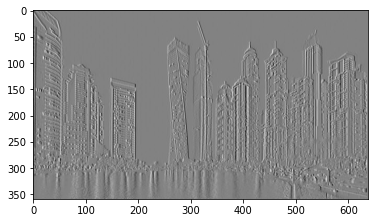

In [276]:
image = processImage('sc.png')
image = processImage('Image.jpeg')
# Edge Detection Kernel
kernel = np.array([
    [-1, -1, -1],
 [-1, 8, -1], 
 [-1, -1, -1]])
# output =convolve(image, kernel)
# plt.imshow(output)
k1 = np.transpose(np.array([
    [1,2,1]
]))
k2 = np.array([
    [1,0,-1]
])
output = convolve_separable(image,k1,k2)
plt.imshow(output)
(k1) * k2

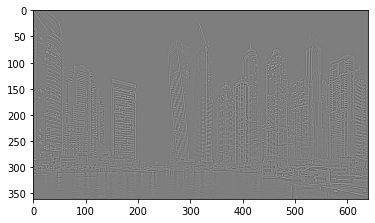

True

In [268]:
image = processImage('sc.png')
image = processImage('Image.jpeg')

# Edge Detection Kernel
kernel = np.array([
    [-1, -1, -1],
 [-1, 8, -1], 
 [-1, -1, -1]])

# pair of sobel kernels (they are linearly separable)
k1 = np.transpose(np.array([
    [1,2,1]
]))
k2 = np.array([
    [-1,0,1]
])
# kernel =np.transpose(kernel)
# Convolve and Save Output
output = convolve2D(image, k1, padding=2)
output = convolve2D(output, k2, padding=2)
# output = convolve2D(image, a, padding = 1)

output = convolve2D(image, kernel, padding=2)


plt.imshow(output)

# plt.imshow(output, cmap='gray')
# plt.gray()
plt.show()
# output.save()


cv2.imwrite('2DConvolved.jpg', output)
# plt.savefig('s.jpg')